In [ ]:
import rpyc
import matplotlib.pyplot as plt
conn = rpyc.classic.connect("ev3dev.local") # host name or IP address of the EV3
ev3 = conn.modules['ev3dev2']      # import ev3dev2.ev3 remotely

legosensors=conn.modules['ev3dev2.sensor.lego']
sensor_controls=conn.modules['ev3dev2.sensor']
motor=conn.modules['ev3dev2.motor']
m = motor.LargeMotor("outA")

out1=sensor_controls.INPUT_1
out2=sensor_controls.INPUT_2

touch = legosensors.TouchSensor(out1)
touchstop = legosensors.TouchSensor(out2)


This is two experiments to check the response speed of the robots.  
First, the response speed of the sensors, and second, the response speed of the motors.

# Sensor response experiment
Setup: A button connected to the brick.

In [ ]:
reactlist=[]
for _ in range(1000):

    past=time.clock()
    while True:
        if not touch.is_pressed:

            reactlist.append(time.clock()-past)
            break

# Motor response experiment
Setup: A motor with an arm, hitting a button, see below.
![Experiment](./Motor_react_speed.gif)

In [ ]:
def useless():
    past=time.clock()
    stop=0
    
    # valid choices are BLACK,RED,GREEN,AMBER,ORANGE,YELLOW
    #led.set_color("LEFT", "GREEN")
    #led.set_color("RIGHT", "GREEN")


    while stop==0:
        m.on(-100) # starts general motion, does NOT have to be turned off to continue
        
        if touchstop.is_pressed:
            retval=time.clock()-past
            stop=1
            m.on_for_degrees(20,10) #has to be completed for the robot to continue
            #sound.speak("good bye")
            #led.set_color("LEFT", "RED")
            #led.set_color("RIGHT", "RED")
            m.off()
            return(retval)

In [ ]:
motorreactlist=[]
for _ in range(1000):  
    motorreactlist.append(useless())


# Analysis of results

In [16]:
# Load results from first run, this will overwrite your lists!
import matplotlib.pyplot as plt
import numpy as np

F = open("reactlist.txt","r") 
button_preproc=F.read()
F.close()
# reactlist=[float(ele) for ele in button_preproc.replace(",","").splitlines()]
F = open("motorreactlist.txt","r") 
button_preproc=F.read()
F.close()
# motorreactlist=[float(ele) for ele in button_preproc.replace(",","").splitlines()]


0.06580542673849102
0.08472178950994202
0.12383595950533077


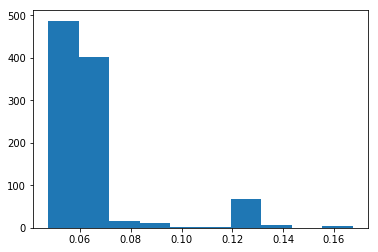

In [24]:
reactmean=sum(reactlist)/len(reactlist)
reactsecondmom=sum([val**2 for val in reactlist])/len(reactlist)
reactvar=reactsecondmom-reactmean**2

motor_without_sensor=[x-reactmean for x in motorreactlist]
motormean=sum(motor_without_sensor)/len(motor_without_sensor)
motorreactsecondmom=sum([val**2 for val in motor_without_sensor])/len(motor_without_sensor)
motorreactvar=motorreactsecondmom-motormean**2
print(motormean)
print(sum(motorreactlist)/len(motorreactlist))
print(np.percentile(motor_without_sensor,95))
plt.hist(motor_without_sensor)
plt.show()

Sensor reaction speeds are generally quick, below 0,02 seconds, and the time distribution is not worrying. Motor reaction speeds (minus average button speed) show a similar pattern, but slightly slower. 95% of the observed motor reaction speeds were below 0,124 seconds.